# Universidad Pólitecnica Salesiana
### Estudiante: Angel Jadan
### Fecha: 11/05/2021
### Asignatura: Simulación


In [109]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv'

df = pd.read_csv(url)
df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


In [110]:
df['index'] = df.index

df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis,index
0,21/01/2021,0,0,0,0
1,22/01/2021,108,108,0,1
2,27/01/2021,2982,2982,0,2
3,04/02/2021,6228,6228,0,3
4,17/02/2021,8190,6228,1962,4


In [111]:
filt = df[df['fecha'].isin(["04/05/2021"])]
filt

,fecha,dosis_total,primera_dosis,segunda_dosis,index
45,04/05/2021,1141262,889218,252044,45


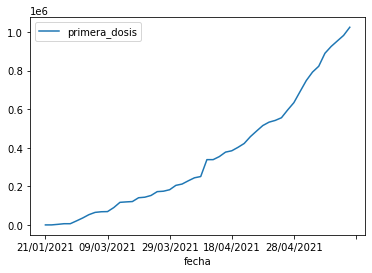

In [112]:
df.plot(x ='fecha', y='primera_dosis')

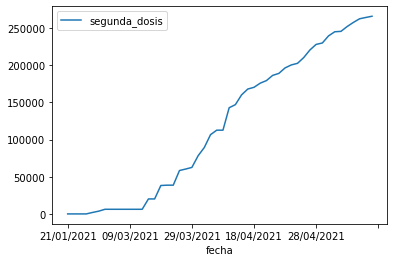

In [113]:
df.plot(x ='fecha', y='segunda_dosis')

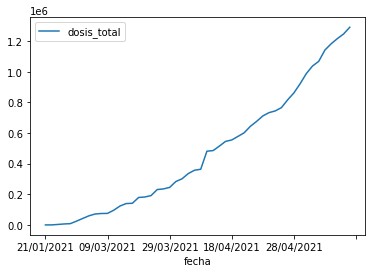

In [114]:
df.plot(x ='fecha', y='dosis_total')

#### Datos por fabricante y fechas.


In [115]:
url_fab = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv'

df_fab = pd.read_csv(url_fab)
df_fab

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021
5,Pfizer/BioNTech,73710,10/03/2021
6,Oxford/AstraZeneca,84000,17/03/2021
7,Pfizer/BioNTech,62010,17/03/2021
8,Pfizer/BioNTech,65520,24/03/2021
9,Pfizer/BioNTech,66690,31/03/2021


#### Gráfica de pie de vacunas obtenidas en total

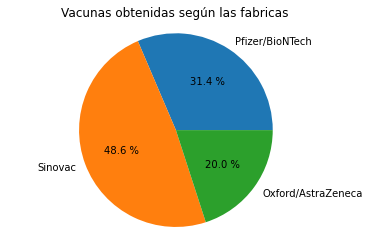

In [116]:
pfizer = df_fab[df_fab['vaccine'].isin(['Pfizer/BioNTech'])]
sinovac = df_fab[df_fab['vaccine'].isin(['Sinovac'])]
oxford = df_fab[df_fab["vaccine"].isin(['Oxford/AstraZeneca'])]

#print(pfizer)
#print(sinovac)
#print(oxford)

ptot = pfizer["total"]
pdat = pfizer["arrived_at"]
stot = sinovac["total"]
sdat = sinovac["arrived_at"]
otot = oxford["total"]
odat = oxford["arrived_at"]

psum = ptot.values.sum()
ssum = stot.values.sum()
osum = otot.values.sum()

datos = [psum,ssum, osum]
facts = ['Pfizer/BioNTech','Sinovac','Oxford/AstraZeneca']

'''plt.plot(pfizer["total"],pfizer['arrived_at'],'blue',sinovac["total"], sinovac["arrived_at"],\
        oxford["total"], oxford["arrived_at"])
    plt.legend(["Pfizer/BioTech","Sinovac","Oxford/AstraZeneca"])
        '''

#print(datos.values)
plt.pie(datos, labels=facts, autopct="%0.1f %%")

plt.axis("equal")
plt.title("Vacunas obtenidas según las fabricas")
plt.show()



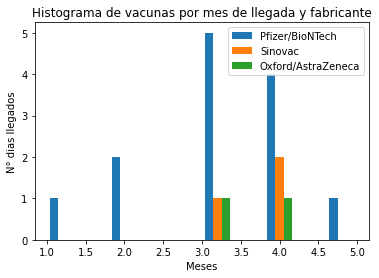

,total,month
4,20000,3
11,300000,4
12,700000,4


In [117]:

#df_fab["month"] = df_fab['arrived_at']
month= df_fab['arrived_at']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_fab["month"]=me


pfi = df_fab[df_fab['vaccine'].isin(['Pfizer/BioNTech'])]
pfi = pfi.loc[:,['total','month']]

sin = df_fab[df_fab['vaccine'].isin(['Sinovac'])]
sin = sin.loc[:,['total', 'month']]

oxf = df_fab[df_fab['vaccine'].isin(['Oxford/AstraZeneca'])]
oxf = oxf.loc[:,['total', 'month']]

plt.title("Histograma de vacunas por mes de llegada y fabricante")
plt.xlabel("Meses")
plt.ylabel("N° dias llegados")

plt.hist([pfi["month"], sin["month"],oxf['month']], label=['Pfizer/BioNTech','Sinovac','Oxford/AstraZeneca'])
plt.legend(loc="upper right")
plt.show()
sin


# Falta implementar parametrizar por rango de fechas inicio y fin.

In [118]:
df_fab

,vaccine,total,arrived_at,month
0,Pfizer/BioNTech,8190,20/01/2021,1
1,Pfizer/BioNTech,16380,17/02/2021,2
2,Pfizer/BioNTech,17550,24/02/2021,2
3,Pfizer/BioNTech,31590,03/03/2021,3
4,Sinovac,20000,06/03/2021,3
5,Pfizer/BioNTech,73710,10/03/2021,3
6,Oxford/AstraZeneca,84000,17/03/2021,3
7,Pfizer/BioNTech,62010,17/03/2021,3
8,Pfizer/BioNTech,65520,24/03/2021,3
9,Pfizer/BioNTech,66690,31/03/2021,3


### Modelos de simulación

#### Regresión lineal

In [119]:
df_dos = df

month= df['fecha']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_dos["total"] = df["dosis_total"]
df_dos["mes"] = me
del df_dos["dosis_total"]
df_dos.head()

,fecha,primera_dosis,segunda_dosis,index,total,mes
0,21/01/2021,0,0,0,0,1
1,22/01/2021,108,0,1,108,1
2,27/01/2021,2982,0,2,2982,1
3,04/02/2021,6228,0,3,6228,2
4,17/02/2021,6228,1962,4,8190,2


In [125]:
x = list(df.iloc[:,5])#Fecha
y = list(df.iloc[:,4])#Total
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1,1),y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [334108.28718762]
Independent term: 
 -711493.2566441887


In [137]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
n = 55
y_prediccion = regr.predict([[n]])
pred = int(y_prediccion)
if pred >= 17268000:
    print('Problación 17 268 000',' n° vacunar',pred)
    print('Tiempo para vacunación de población completa: ',round(n/12,2)," Años = ",n,' meses.')
else:
    print('vacunados ',pred)

Problación 17 268 000  n° vacunar 17664462
Tiempo para vacunación de población completa:  4.58  Años =  55  meses.


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


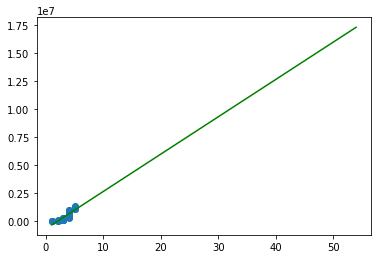

In [138]:
#Grafica
plt.scatter(x, y)
x_real = np.array(range(1, 55))

print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

#Graficar
plt.scatter(x, y)
x_real = np.array(range(1, 6))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Modelo exponencial

In [139]:
from scipy.optimize import curve_fit
x = np.array(df["mes"])
y = np.array(df["total"])
#y[0]=1

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

res1 , res2 = curve_fit(func,x,y)
print(res1)
print(res2)


[ -11646.56510892  214175.38317867 -634600.53432616  450209.7682928 ]
[[ 1.97563658e+08 -1.84230568e+09  5.12288633e+09 -3.91790539e+09]
 [-1.84230568e+09  1.74096905e+10 -4.92238360e+10  3.85623690e+10]
 [ 5.12288633e+09 -4.92238360e+10  1.42445201e+11 -1.15938000e+11]
 [-3.91790539e+09  3.85623690e+10 -1.15938000e+11  1.01467466e+11]]


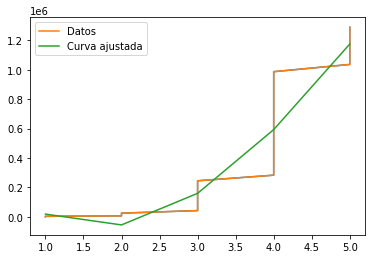

In [140]:
#Grafica
plt.plot(x,y)
plt.plot(x,y, label="Datos")

plt.plot(x, func(x, *res1), label="Curva ajustada")

plt.legend(loc='upper left')
plt.show()

### Modelo polinomico

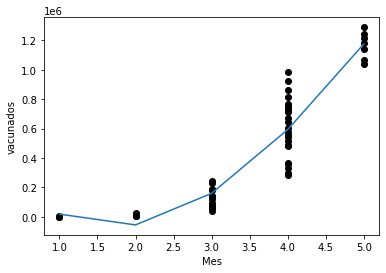

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = x.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression()
pre_proces = PolynomialFeatures(degree=3)

x_polin = pre_proces.fit_transform(x)

pr_model = LinearRegression()
pr_model.fit(x_polin,y)
y_pred = pr_model.predict(x_polin)

plt.scatter(x,y,c="black")
plt.xlabel("Mes")
plt.ylabel("vacunados")
plt.plot(x,y_pred)

In [142]:
y_mes = pr_model.predict(pre_proces.fit_transform([[12]]))
y_mes

array([[3550992.17432014]])


### Datos de vacunación en España
URL:https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/vacunas/estado_vacunacion_.csv

In [143]:
url_es = 'https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/vacunas/estado_vacunacion_.csv'

df_es = pd.read_csv(url_es)
print('Total=>',df_es["Total pauta completada"].tail(1))
df_es.head()


Total=> 1834    6327447.0
Name: Total pauta completada, dtype: float64


,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...


In [144]:
month= df_es['date_pub']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_es["mes"]=me

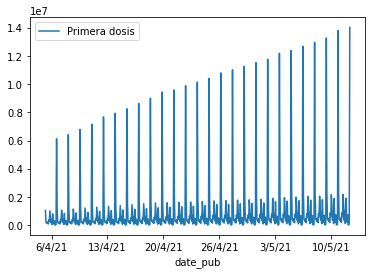

In [145]:
mes = np.array(df_es["date_pub"])

df_es.plot(x='date_pub', y = "Total 1 vacuna",label="Primera dosis")

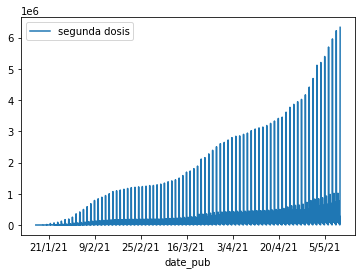

In [146]:
df_es.plot(x="date_pub", y = 'Total pauta completada', label='segunda dosis')

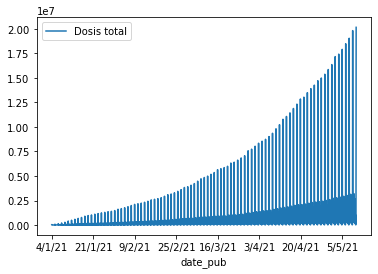

In [147]:
df_es.plot(x="date_pub", y = 'Dosis administradas', label ="Dosis total")

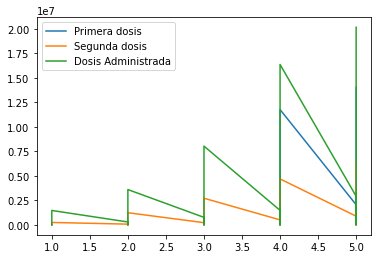

In [148]:
plt.plot(df_es["mes"],df_es["Total 1 vacuna"], label="Primera dosis")
plt.plot(df_es["mes"], df_es["Total pauta completada"], label='Segunda dosis')
plt.plot(df_es["mes"], df_es["Dosis administradas"], label="Dosis Administrada")
plt.legend(loc='upper left')
plt.show()

### Datos de chile
 https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/vacunas/estado_vacunacion_.csv

In [149]:
url_ch = "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/vacunas/estado_vacunacion_.csv"
df_ch = pd.read_csv(url_ch)
df_ch.head()

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...


Text(0.5, 1.0, 'Dosis entregadas')

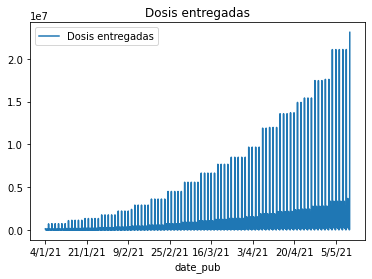

In [150]:
month= df_ch['date_pub']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_ch["mes"]=me

df_ch.plot(x = "date_pub", y ="Dosis entregadas")
plt.title("Dosis entregadas")


Text(0.5, 1.0, 'Dosis administradas')

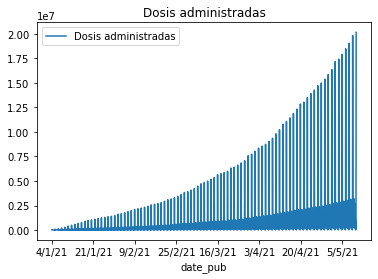

In [151]:
df_ch.plot(x = "date_pub", y ="Dosis administradas")
plt.title("Dosis administradas")

## Datos de vacunación en Estados Unidos

https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/Vacunacion/WORK_ARCHIVO_1.csv

In [152]:
url_eu = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/Vacunacion/WORK_ARCHIVO_1.csv'

In [153]:
df_eu = pd.read_csv(url_eu,sep=";",encoding="latin-1")

month= df_eu['FECHA_INMUNIZACION']
me = []
for m in month:
    mes = m.split("/")
    me.append(int(mes[1]))
df_eu["mes"]=me

tot = np.array(df_eu["SUM_of_SUM_of_1aDOSIS"])+np.array(df_eu['SUM_of_SUM_of_2aDOSIS'])
df_eu["total"]=tot
df_eu

,REGION_CORTO,COD_COMUNA_FINAL,FECHA_INMUNIZACION,SUM_of_SUM_of_1aDOSIS,SUM_of_SUM_of_2aDOSIS,mes,total
0,Metropolitana Santiago,13101,24/12/2020,280.0,NaN,12,NaN
1,Metropolitana Santiago,13108,24/12/2020,70.0,NaN,12,NaN
2,Metropolitana Santiago,13123,24/12/2020,70.0,NaN,12,NaN
3,Bíobío,8101,25/12/2020,406.0,NaN,12,NaN
4,Bíobío,8107,25/12/2020,45.0,NaN,12,NaN
...,...,...,...,...,...,...,...
26666,Ñuble,16301,10/05/2021,205.0,243.0,5,448.0
26667,Ñuble,16302,10/05/2021,151.0,66.0,5,217.0
26668,Ñuble,16303,10/05/2021,24.0,16.0,5,40.0
26669,Ñuble,16304,10/05/2021,24.0,10.0,5,34.0


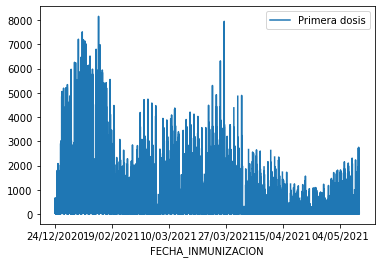

In [154]:
df_eu.plot(x="FECHA_INMUNIZACION", y ="SUM_of_SUM_of_1aDOSIS", label="Primera dosis")

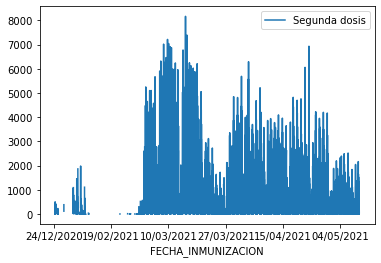

In [155]:
df_eu.plot(x='FECHA_INMUNIZACION', y="SUM_of_SUM_of_2aDOSIS", label="Segunda dosis")

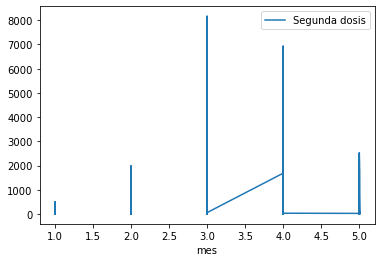

In [156]:
df_eu.plot(x='mes', y="SUM_of_SUM_of_2aDOSIS", label="Segunda dosis")

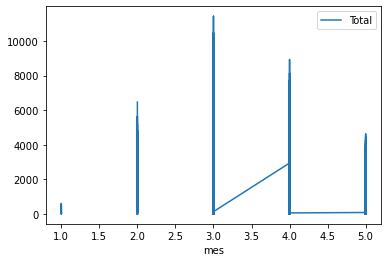

In [157]:
df_eu.plot(x="mes", y ="total", label="Total")

### Comparación en paises
#### Ecuador.

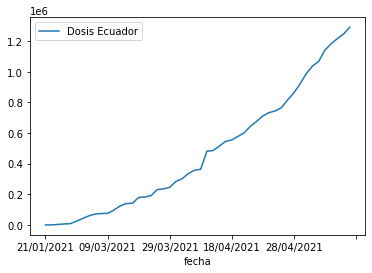

In [158]:
df.plot(x='fecha', y ="total", label="Dosis Ecuador")


### España

total 1           2004
2           9380
3            153
4           4846
5            304
          ...   
1830     1039070
1831       26314
1832       21973
1833       75974
1834    20162661
Name: Dosis administradas, Length: 1834, dtype: int64


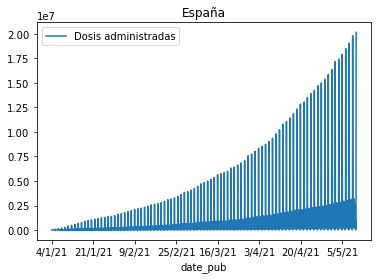

In [159]:
df_es.plot(x="date_pub",y = "Dosis administradas")
plt.title("España")
print('total',df_es["Dosis administradas"].tail(-1))

### Chile

Text(0.5, 1.0, 'Dosis administradas Chile')

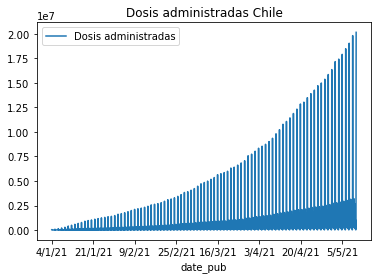

In [160]:
df_ch.plot(x="date_pub", y = "Dosis administradas")
plt.title("Dosis administradas Chile")

### Estados Unidos

26670    107.0
Name: total, dtype: float64


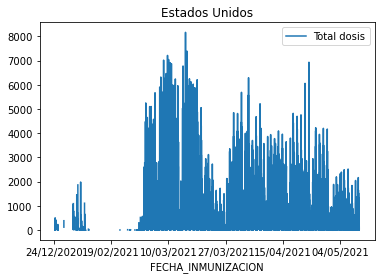

In [162]:
df_eu.plot(x='FECHA_INMUNIZACION', y="SUM_of_SUM_of_2aDOSIS", label="Total dosis")
plt.title("Estados Unidos")
print(df_eu["total"].tail(1))

### Bibliografia.

[link] https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv
<br>
[link] https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/Vacunacion/WORK_ARCHIVO_1.csv
<br>
[link] https://github.com/andrab/ecuacovid/blob/master/datos_crudos/vacunas/vacunas.csv

![La funcion exponencial y logaritmica] https://www.superprof.es/apuntes/escolar/matematicas/calculo/funciones/funcion-exponencial.html
